In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data = pd.read_csv(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df = data.sample(frac=0.7,random_state=0)

#train data
train_data = df.drop('Class',axis=1)
train_labels = df['Class']

#test_data
test_data = data.drop(train_data.index)
test_labels = test_data['Class']
test_data = test_data.drop('Class',axis=1)

#numerical values
train_data = train_data.iloc[:].values
test_data = test_data.iloc[:].values

#validation data
val_data = train_data[159492:]
val_labels = train_labels[159492:]

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
print(val_data.shape)
print(val_labels.shape)

(199365, 30)
(199365,)
(85442, 30)
(85442,)
(39873, 30)
(39873,)


In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=train_data.shape))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
#from keras import losses
#from keras import metrics

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
 #             loss=losses.binary_crossentropy,
  #            metrics=[metrics.binary_accuracy])

In [13]:
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=1000,
                    validation_data=(val_data, val_labels))

Epoch 1/10
19937/19937 [==============================] - 32s 2ms/step - loss: 1.2851 - accuracy: 0.9897 - val_loss: 0.3001 - val_accuracy: 0.9986
Epoch 2/10
19937/19937 [==============================] - 31s 2ms/step - loss: 1.3226 - accuracy: 0.9897 - val_loss: 0.2091 - val_accuracy: 0.9986
Epoch 3/10
19937/19937 [==============================] - 31s 2ms/step - loss: 0.2325 - accuracy: 0.9962 - val_loss: 0.1669 - val_accuracy: 0.9986
Epoch 4/10
19937/19937 [==============================] - 31s 2ms/step - loss: 0.2500 - accuracy: 0.9974 - val_loss: 0.0132 - val_accuracy: 0.9986
Epoch 5/10
19937/19937 [==============================] - 32s 2ms/step - loss: 0.1373 - accuracy: 0.9981 - val_loss: 0.0743 - val_accuracy: 0.9986
Epoch 6/10
19937/19937 [==============================] - 31s 2ms/step - loss: 0.1414 - accuracy: 0.9981 - val_loss: 0.0237 - val_accuracy: 0.9986
Epoch 7/10
19937/19937 [==============================] - 31s 2ms/step - loss: 0.1622 - accuracy: 0.9967 - val_loss: 0

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

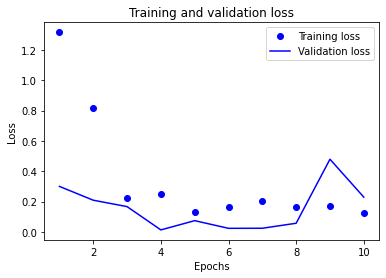

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

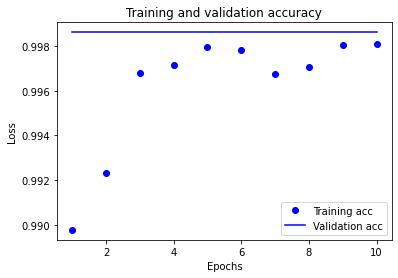

In [24]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=train_data.shape))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=15, batch_size=1000)

Epoch 1/15
200/200 [==============================] - 1s 3ms/step - loss: 13.8047 - accuracy: 0.9784
Epoch 2/15
200/200 [==============================] - 0s 2ms/step - loss: 4.5920 - accuracy: 0.9891
Epoch 3/15
200/200 [==============================] - 0s 2ms/step - loss: 4.7176 - accuracy: 0.9898
Epoch 4/15
200/200 [==============================] - 0s 2ms/step - loss: 3.8080 - accuracy: 0.9913
Epoch 5/15
200/200 [==============================] - 0s 2ms/step - loss: 5.7175 - accuracy: 0.9814
Epoch 6/15
200/200 [==============================] - 0s 2ms/step - loss: 3.7248 - accuracy: 0.9891
Epoch 7/15
200/200 [==============================] - 1s 3ms/step - loss: 4.6256 - accuracy: 0.9914
Epoch 8/15
200/200 [==============================] - 0s 2ms/step - loss: 3.3555 - accuracy: 0.9855
Epoch 9/15
200/200 [==============================] - 1s 3ms/step - loss: 4.1877 - accuracy: 0.9910
Epoch 10/15
200/200 [==============================] - 1s 3ms/step - loss: 7.0199 - accuracy: 0.985

In [26]:
results = model.evaluate(test_data, test_labels)
print('Accuracy==> ',results[1])

2671/2671 [==============================] - 3s 1ms/step - loss: 3.3894 - accuracy: 0.9982


[3.3894407749176025, 0.998185932636261]